In [73]:
##SETUP

In [74]:
import sys
assert sys.version_info >= (3, 5)

In [75]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [76]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sb
import urllib
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [77]:
#Extra imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import MultinomialNB

In [78]:
# Importing correlation coefficents
import scipy
from scipy.stats import pearsonr

In [79]:
##GET DATA

address1 = 'C:/Users/varun/Desktop/Dissertation/train.csv'
db1 = pd.read_csv(address1)

address2 = 'C:/Users/varun/Desktop/Dissertation/data.csv'
db2 = pd.read_csv(address2)

***Using Dataset 1***

In [80]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [81]:
# Finding the correlation coefficient

corr_pearson = db1.corr(method='pearson')
print('PearsonR Correlation Coefficent Matrix')
print(corr_pearson.label)

PearsonR Correlation Coefficent Matrix
id       0.00114
label    1.00000
Name: label, dtype: float64


In [82]:
# Checking for null values
db1.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [83]:
# Dropping all null values
db1 = db1.dropna()
db1.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [84]:
# Data Preprocessing
# We drop the text column while merging the title and author column. This is done to simplify later processes.

db1 = db1.drop(['text'], axis = 1)
db1['content'] = db1['author'] + ': ' + db1['title']

db1.head()

,id,title,author,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,Darrell Lucus: House Dem Aide: We Didn’t Even ...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"Daniel J. Flynn: FLYNN: Hillary Clinton, Big W..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Consortiumnews.com: Why the Truth Might Get Yo...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,Jessica Purkiss: 15 Civilians Killed In Single...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Howard Portnoy: Iranian woman jailed for ficti...


In [85]:
# Convert the text in content column to all lowercase. This helps to convert the textual data into numerical data.

db1['content'] = db1['content'].str.lower()
print(db1['content'])

0        darrell lucus: house dem aide: we didn’t even ...
1        daniel j. flynn: flynn: hillary clinton, big w...
2        consortiumnews.com: why the truth might get yo...
3        jessica purkiss: 15 civilians killed in single...
4        howard portnoy: iranian woman jailed for ficti...
                               ...                        
20795    jerome hudson: rapper t.i.: trump a ’poster ch...
20796    benjamin hoffman: n.f.l. playoffs: schedule, m...
20797    michael j. de la merced and rachel abrams: mac...
20798    alex ansary: nato, russia to hold parallel exe...
20799             david swanson: what keeps the f-35 alive
Name: content, Length: 18285, dtype: object


In [86]:
# Split the dataset into two smaller sets

X = db1['content'].values
Y = db1['label'].values

In [87]:
# We convert the textual data into numerical data

vect = TfidfVectorizer()
vect.fit(X)

X = vect.transform(X)
print(X)

  (0, 21778)	0.1801798697006809
  (0, 21124)	0.2705473683600946
  (0, 20793)	0.34607476433065565
  (0, 17882)	0.22413539849458575
  (0, 12046)	0.2997920929811835
  (0, 11689)	0.24960940690939667
  (0, 10657)	0.20398036311058051
  (0, 10559)	0.15272434858517348
  (0, 9708)	0.182993571354693
  (0, 7062)	0.22867144545869883
  (0, 5739)	0.24806039320792872
  (0, 5421)	0.24806039320792872
  (0, 5142)	0.2997920929811835
  (0, 4202)	0.2048709520487992
  (0, 3597)	0.3111359569102862
  (0, 843)	0.26405276418526397
  (1, 22151)	0.30117029946146845
  (1, 14122)	0.15832819043407434
  (1, 9471)	0.19024677320120018
  (1, 7862)	0.7023010892392251
  (1, 5105)	0.26099095591300686
  (1, 4004)	0.19287396699285944
  (1, 3261)	0.3767493523721914
  (1, 2864)	0.14895464095603386
  (1, 2362)	0.29217079660523154
  :	:
  (18282, 10517)	0.1242774149029686
  (18282, 9743)	0.20563746370855335
  (18282, 5190)	0.2084199087545075
  (18282, 3159)	0.14442469162399513
  (18282, 2111)	0.3185903620235717
  (18282, 1372)	0

In [88]:
# Logistic Regression

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, stratify = Y, random_state=100)

LR = LogisticRegression(solver = 'liblinear')
LR.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

Accuracy =  0.9742958709324583
Precision =  0.9531914893617022
Recall =  0.9892744479495268
F1 Score =  0.9708978328173375


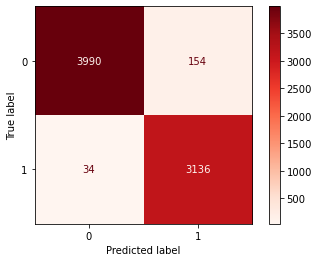

Area under curve:  0.9977177295592122


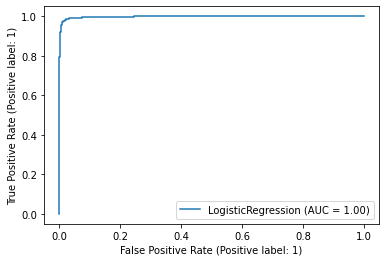

In [89]:
# Finding out the accuracy, F1-score, Recall and Precision
pred_LR = LR.predict(X_test)

#Accuracy
LR_acc = metrics.accuracy_score(Y_test, pred_LR)
print("Accuracy = ", LR_acc)

#Precision
LR_prec = metrics.precision_score(Y_test, pred_LR)
print("Precision = ", LR_prec)

#Recall
LR_rec = metrics.recall_score(Y_test, pred_LR)
print("Recall = ", LR_rec)

#F1 Score
LR_f1 = metrics.f1_score(Y_test, pred_LR)
print("F1 Score = ", LR_f1)

#Confusion Matrix
LR_cm = confusion_matrix(Y_test, pred_LR)
LR_matrix = plot_confusion_matrix(LR, X_test, Y_test, cmap = plt.cm.Reds)
plt.show()

#ROC Curve
metrics.plot_roc_curve(LR, X_test, Y_test)
LR_prob = LR.predict_proba(X_test)[::, 1]
LR_auc = metrics.roc_auc_score(Y_test, LR_prob)
print("Area under curve: ", LR_auc)

warnings.filterwarnings("ignore")

In [90]:
# Decision Trees

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, stratify = Y, random_state=100)

DT = DecisionTreeClassifier(max_depth=2, random_state=42)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Accuracy =  0.9062072737216298
Precision =  0.8237747653806048
Recall =  0.9968454258675079
F1 Score =  0.9020839280616614


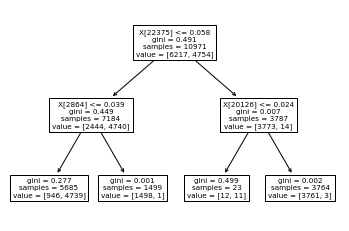

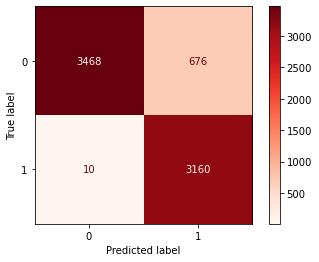

Area under curve:  0.917538488240381


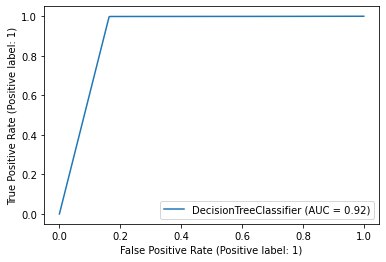

In [91]:
# Finding out the accuracy, F1-score, Recall and Precision
pred_DT = DT.predict(X_test)

#Accuracy
DT_acc = metrics.accuracy_score(Y_test, pred_DT)
print("Accuracy = ", DT_acc)

#Precision
DT_prec = metrics.precision_score(Y_test, pred_DT)
print("Precision = ", DT_prec)

#Recall
DT_rec = metrics.recall_score(Y_test, pred_DT)
print("Recall = ", DT_rec)

#F1 Score
DT_f1 = metrics.f1_score(Y_test, pred_DT)
print("F1 Score = ", DT_f1)

plot_tree(DT)

#Confusion Matrix
DT_cm = confusion_matrix(Y_test, pred_DT)
DT_matrix = plot_confusion_matrix(DT, X_test, Y_test, cmap = plt.cm.Reds)
plt.show()

#ROC Curve
metrics.plot_roc_curve(DT, X_test, Y_test)
DT_prob = DT.predict_proba(X_test)[::, 1]
DT_auc = metrics.roc_auc_score(Y_test, DT_prob)
print("Area under curve: ", DT_auc)

warnings.filterwarnings("ignore")

In [92]:
#Multinomial Naive Bayes

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, stratify = Y, random_state=100)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

Accuracy =  0.9362865736942849
Precision =  0.9981577008106116
Recall =  0.8545741324921136
F1 Score =  0.9208021753908905


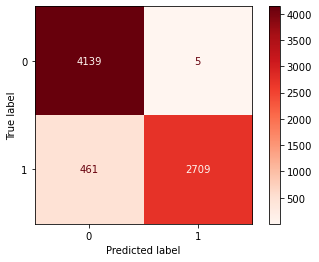

Area under curve:  0.9966911988599685


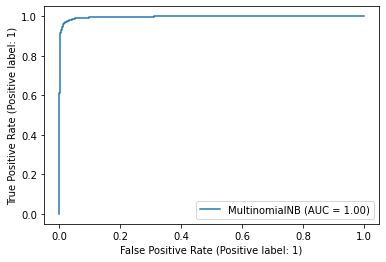

In [93]:
# Finding out the accuracy, F1-score, Recall and Precision
pred_MNB = MNB.predict(X_test)

#Accuracy
MNB_acc = metrics.accuracy_score(Y_test, pred_MNB)
print("Accuracy = ", MNB_acc)

#Precision
MNB_prec = metrics.precision_score(Y_test, pred_MNB)
print("Precision = ", MNB_prec)

#Recall
MNB_rec = metrics.recall_score(Y_test, pred_MNB)
print("Recall = ", MNB_rec)

#F1 Score
MNB_f1 = metrics.f1_score(Y_test, pred_MNB)
print("F1 Score = ", MNB_f1)

#Confusion Matrix
MNB_cm = confusion_matrix(Y_test, pred_MNB)
MNB_matrix = plot_confusion_matrix(MNB, X_test, Y_test, cmap = plt.cm.Reds)
plt.show()

#ROC Curve
metrics.plot_roc_curve(MNB, X_test, Y_test)
MNB_prob = MNB.predict_proba(X_test)[::, 1]
MNB_auc = metrics.roc_auc_score(Y_test, MNB_prob)
print("Area under curve: ", MNB_auc)

warnings.filterwarnings("ignore")

***Using Dataset 2***

In [94]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   URLs      4008 non-null   object 
 1   Headline  4010 non-null   object 
 2   Body      3986 non-null   object 
 3   Label     4008 non-null   float64
dtypes: float64(1), object(3)
memory usage: 125.5+ KB


In [95]:
# Finding the correlation coefficient

corr_pearson = db2.corr(method='pearson')
print('PearsonR Correlation Coefficent Matrix')
print(corr_pearson.Label)

PearsonR Correlation Coefficent Matrix
Label    1.0
Name: Label, dtype: float64


In [96]:
# Checking for null values in the dataset
db2.isna().sum()

URLs         4
Headline     2
Body        26
Label        4
dtype: int64

In [97]:
# Dropping all null values
db2 = db2.dropna()
db2.isna().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

In [98]:
# Data Preprocessing
# We drop the URLs and Body columns. This is done to simplify later processes.

db2 = db2.drop(['URLs'], axis = 1)
db2 = db2.drop(['Headline'], axis = 1)

db2.head()

,Body,Label
0,Image copyright Getty Images\nOn Sunday mornin...,1.0
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1.0
2,The feud broke into public view last week when...,1.0
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1.0
4,"Country singer Jason Aldean, who was performin...",1.0


In [99]:
# Convert the text in Headline column to all lowercase. This helps to convert the textual data into numerical data.

db2['Body'] = db2['Body'].str.lower()
print(db2['Body'])

0       image copyright getty images\non sunday mornin...
1       london (reuters) - “last flag flying”, a comed...
2       the feud broke into public view last week when...
3       mexico city (reuters) - egypt’s cheiron holdin...
4       country singer jason aldean, who was performin...
                              ...                        
4006    vietnam is in great danger, you must publish a...
4007    trends to watch\n% of readers think this story...
4008    trump jr. is soon to give a 30-minute speech f...
4010    shanghai (reuters) - china said it plans to ac...
4011    vice president mike pence leaves nfl game beca...
Name: Body, Length: 3986, dtype: object


In [100]:
# Split the dataset into two smaller sets

x = db2['Body'].values
y = db2['Label'].values

In [101]:
vect = TfidfVectorizer()
vect.fit(x)

x = vect.transform(x)
print(x)

  (0, 45780)	0.01772238617014786
  (0, 45772)	0.013186990541178115
  (0, 45686)	0.009950521253935527
  (0, 45501)	0.034474322388693274
  (0, 45408)	0.02453342225139396
  (0, 45388)	0.01977959026969816
  (0, 45372)	0.018155299290937243
  (0, 45256)	0.04428999488818559
  (0, 45182)	0.023775201000804908
  (0, 45117)	0.032238198341497507
  (0, 45036)	0.044407442263152845
  (0, 45010)	0.008076244008478102
  (0, 44984)	0.0774704698881216
  (0, 44943)	0.02561213500287012
  (0, 44933)	0.009181374720932129
  (0, 44910)	0.03696786270829401
  (0, 44858)	0.01827481957729534
  (0, 44844)	0.009196450616249924
  (0, 44840)	0.015032311712308899
  (0, 44687)	0.00840760482696482
  (0, 44663)	0.011965505732272308
  (0, 44598)	0.017393145039350254
  (0, 44585)	0.02167498473620604
  (0, 44521)	0.01631633959567429
  (0, 44325)	0.02508716347843856
  :	:
  (3985, 3915)	0.03395677471843458
  (3985, 3811)	0.015975900057141338
  (3985, 3711)	0.009063627296237444
  (3985, 3464)	0.04263799845240058
  (3985, 3408)	

In [102]:
# We convert the Label column values to int from float to make later processes simpler.

db2['Label'] = db2['Label'].apply(np.int64)
print(db2['Label'])

0       1
1       1
2       1
3       1
4       1
       ..
4006    0
4007    0
4008    0
4010    1
4011    0
Name: Label, Length: 3986, dtype: int64


In [103]:
# Logistic Regression

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify = y, random_state=100)

LogR = LogisticRegression(solver = 'liblinear')
LogR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Accuracy =  0.9699059561128527
Precision =  0.9604743083003953
Recall =  0.9759036144578314
F1 Score =  0.9681274900398407


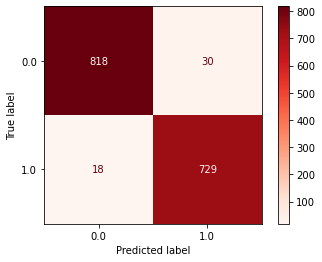

Area under curve:  0.9965285670985831


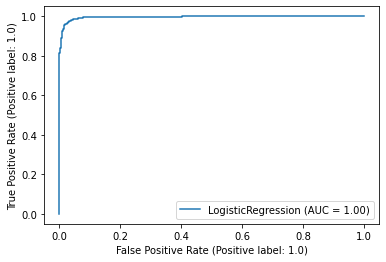

In [104]:
# Finding out the accuracy, F1-score, Recall and Precision
pred_LogR = LogR.predict(x_test)

#Accuracy
LogR_acc = metrics.accuracy_score(y_test, pred_LogR)
print("Accuracy = ", LogR_acc)

#Precision
LogR_prec = metrics.precision_score(y_test, pred_LogR)
print("Precision = ", LogR_prec)

#Recall
LogR_rec = metrics.recall_score(y_test, pred_LogR)
print("Recall = ", LogR_rec)

#F1 Score
LogR_f1 = metrics.f1_score(y_test, pred_LogR)
print("F1 Score = ", LogR_f1)

#Confusion Matrix
LogR_cm = confusion_matrix(y_test, pred_LogR)
LogR_matrix = plot_confusion_matrix(LogR, x_test, y_test, cmap = plt.cm.Reds)
plt.show()

#ROC Curve
metrics.plot_roc_curve(LogR, x_test, y_test)
LogR_prob = LogR.predict_proba(x_test)[::, 1]
LogR_auc = metrics.roc_auc_score(y_test, LogR_prob)
print("Area under curve: ", LogR_auc)

warnings.filterwarnings("ignore")

In [105]:
# Decision Trees

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify = y, random_state=100)

DecTr = DecisionTreeClassifier(max_depth=2, random_state=42)
DecTr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Accuracy =  0.8269592476489028
Precision =  0.943502824858757
Recall =  0.6706827309236948
F1 Score =  0.7840375586854461


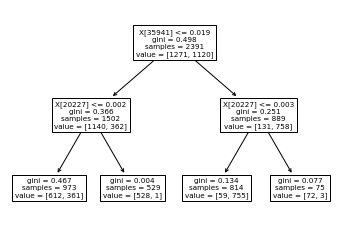

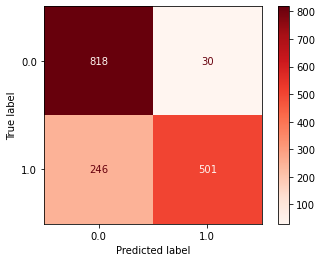

Area under curve:  0.8980986840443534


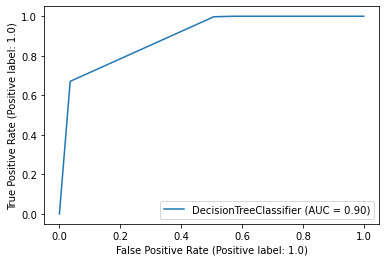

In [106]:
# Finding out the accuracy, F1-score, Recall and Precision
pred_DecTr = DecTr.predict(x_test)

#Accuracy
DecTr_acc = metrics.accuracy_score(y_test, pred_DecTr)
print("Accuracy = ", DecTr_acc)

#Precision
DecTr_prec = metrics.precision_score(y_test, pred_DecTr)
print("Precision = ", DecTr_prec)

#Recall
DecTr_rec = metrics.recall_score(y_test, pred_DecTr)
print("Recall = ", DecTr_rec)

#F1 Score
DecTr_f1 = metrics.f1_score(y_test, pred_DecTr)
print("F1 Score = ", DecTr_f1)

plot_tree(DecTr)

#Confusion Matrix
DecTr_cm = confusion_matrix(y_test, pred_DecTr)
DecTr_matrix = plot_confusion_matrix(DecTr, x_test, y_test, cmap = plt.cm.Reds)
plt.show()

#ROC Curve
metrics.plot_roc_curve(DecTr, x_test, y_test)
DecTr_prob = DecTr.predict_proba(x_test)[::, 1]
DecTr_auc = metrics.roc_auc_score(y_test, DecTr_prob)
print("Area under curve: ", DecTr_auc)

warnings.filterwarnings("ignore")

In [107]:
#Multinomial Naive Bayes

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify = y, random_state=100)

MuNB = MultinomialNB()
MuNB.fit(x_train, y_train)

MultinomialNB()

Accuracy =  0.9366771159874608
Precision =  0.9130434782608695
Recall =  0.9558232931726908
F1 Score =  0.9339437540876389


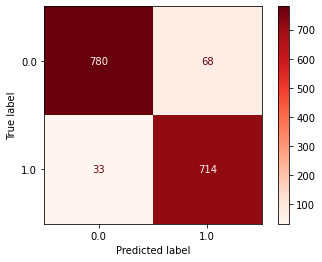

Area under curve:  0.9853865146119066


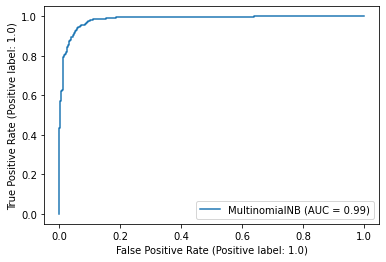

In [108]:
# Finding out the accuracy, F1-score, Recall and Precision
pred_MuNB = MuNB.predict(x_test)

#Accuracy
MuNB_acc = metrics.accuracy_score(y_test, pred_MuNB)
print("Accuracy = ", MuNB_acc)

#Precision
MuNB_prec = metrics.precision_score(y_test, pred_MuNB)
print("Precision = ", MuNB_prec)

#Recall
MuNB_rec = metrics.recall_score(y_test, pred_MuNB)
print("Recall = ", MuNB_rec)

#F1 Score
MuNB_f1 = metrics.f1_score(y_test, pred_MuNB)
print("F1 Score = ", MuNB_f1)

#Confusion Matrix
MuNB_cm = confusion_matrix(y_test, pred_MuNB)
MuNB_matrix = plot_confusion_matrix(MuNB, x_test, y_test, cmap = plt.cm.Reds)
plt.show()

#ROC Curve
metrics.plot_roc_curve(MuNB, x_test, y_test)
MuNB_prob = MuNB.predict_proba(x_test)[::, 1]
MuNB_auc = metrics.roc_auc_score(y_test, MuNB_prob)
print("Area under curve: ", MuNB_auc)

warnings.filterwarnings("ignore")

**Creating an Ensemble method using Stacking. It consists of Logistic Regression, Decision Trees and Multinomial Naive Bayes.**

In [109]:
# imports for stacking
from sklearn.ensemble import StackingClassifier

In [110]:
# Stack models to create ensemble model

def mod_stacking():
 # Defining the base models
 lvl0 = list()
 lvl0.append(('lr', LogisticRegression()))
 lvl0.append(('dt', DecisionTreeClassifier()))
 lvl0.append(('mnb', MultinomialNB()))
 # Defining the meta learner model
 lvl1 = LogisticRegression()
 # Defining the ensemble model
 model = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=5)
 return model

In [111]:
# Functions to evaluate the model's accuracy, precision, recall and f1-score.

def evaluate_model_acc(model, X_train, X_test, y_train, y_test):
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 scores = metrics.accuracy_score(y_test, pred)
 return scores

def evaluate_model_prec(model, X_train, X_test, y_train, y_test):
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 scores = metrics.precision_score(y_test, pred)
 return scores

def evaluate_model_rec(model, X_train, X_test, y_train, y_test):
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 scores = metrics.recall_score(y_test, pred)
 return scores

def evaluate_model_f1(model, X_train, X_test, y_train, y_test):
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 scores = metrics.f1_score(y_test, pred)
 return scores

def roc_curve(model, X_train, X_test, y_train, y_test):
 model.fit(X_train, y_train)
 metrics.plot_roc_curve(model, X_test, y_test)
 model_prob = model.predict_proba(X_test)[::, 1]
 scores = metrics.roc_auc_score(y_test, model_prob)  
 return scores

***Using the ensemble method on dataset 1***

Ensemble method on dataset 1:
Accuracy =  0.9945310363686082
Precision =  0.9940006315124724
Recall =  0.9924290220820189
F1 =  0.9930577469233196
Area under Curve =  0.9994213061642084


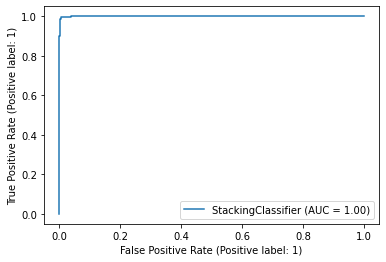

In [112]:
# Evaluating the ensemble model using the dataset 1
# Creating the ensemble model
model = mod_stacking()

# Splitting the dataset into testing and training sets
### The X and Y parameters are already defined in the beginning, when defining for the individual models
## X = db1['content'].values
## Y = db1['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, stratify = Y, random_state=100)

# Finding out the Accuracy, F1-score, Recall and Precision of the ensemble model
acc_d1 = evaluate_model_acc(model, X_train, X_test, Y_train, Y_test)
prec_d1 = evaluate_model_prec(model, X_train, X_test, Y_train, Y_test)
rec_d1 = evaluate_model_rec(model, X_train, X_test, Y_train, Y_test)
f1_d1 = evaluate_model_f1(model, X_train, X_test, Y_train, Y_test)
roc_auc_d1 = roc_curve(model, X_train, X_test, Y_train, Y_test)

print("Ensemble method on dataset 1:")
print("Accuracy = ", acc_d1)
print("Precision = ", prec_d1)
print("Recall = ", rec_d1)
print("F1 = ", f1_d1)
print("Area under Curve = ", roc_auc_d1)

warnings.filterwarnings("ignore")

***Using the ensemble method on dataset 2***

Ensemble method on dataset 2:
Accuracy =  0.974294670846395
Precision =  0.9582790091264668
Recall =  0.9852744310575636
F1 =  0.972865651886168
Area under Curve =  0.9994093547129825


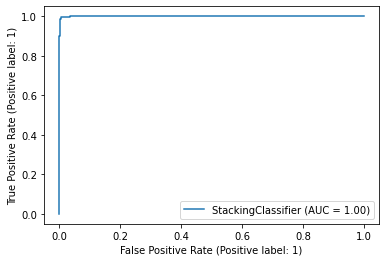

In [113]:
# Evaluating the ensemble model using the dataset 1
# Creating the ensemble model
model = mod_stacking()

# Splitting the dataset into testing and training sets
### The x and y parameters are already defined in the beginning, when defining for the individual models
## x = db2['Body'].values
## y = db2['Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify = y, random_state=100)

# Finding out the Accuracy, F1-score, Recall and Precision of the ensemble model
acc_d2 = evaluate_model_acc(model, x_train, x_test, y_train, y_test)
prec_d2 = evaluate_model_prec(model, x_train, x_test, y_train, y_test)
rec_d2 = evaluate_model_rec(model, x_train, x_test, y_train, y_test)
f1_d2 = evaluate_model_f1(model, x_train, x_test, y_train, y_test)
roc_auc_d2 = roc_curve(model, X_train, X_test, Y_train, Y_test)

print("Ensemble method on dataset 2:")
print("Accuracy = ", acc_d2)
print("Precision = ", prec_d2)
print("Recall = ", rec_d2)
print("F1 = ", f1_d2)
print("Area under Curve = ", roc_auc_d2)

warnings.filterwarnings("ignore")